Dataset loaded successfully.
First 5 rows of the dataset:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_

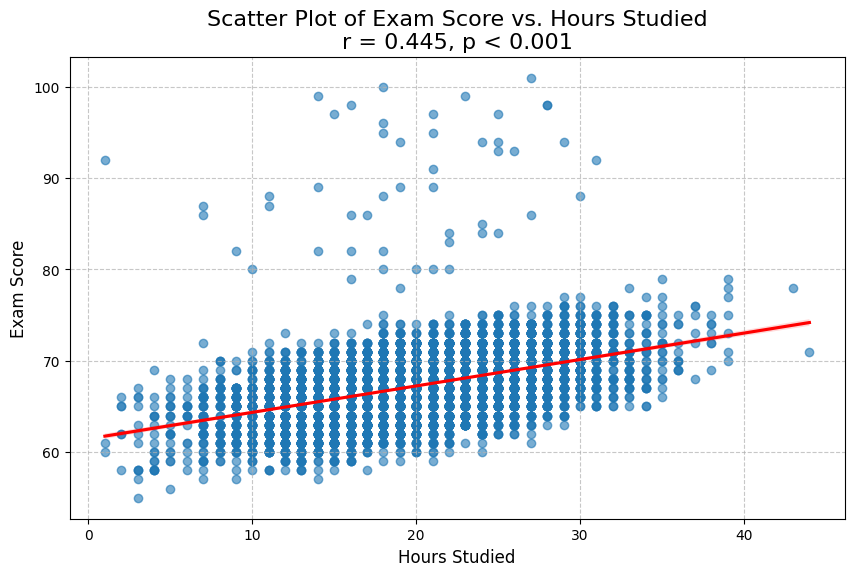

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# --- 1. Load the Dataset ---
try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please upload the file to your Colab environment or provide the correct path.")
    exit()

# --- 2. Define Variables for Hypothesis 1 ---
hours_studied = df['Hours_Studied']
exam_score = df['Exam_Score']

# --- 3. Perform Hypothesis 1: Pearson Correlation Test ---
print("\n--- Hypothesis 1: The Baseline Effect of Study Hours ---")
print("Narrative Question: Does the sheer volume of Hours_Studied show a direct, significant positive relationship with Exam_Score?")

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(hours_studied, exam_score)

print(f"\nPearson Correlation Coefficient (r): {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

# Calculate 95% Confidence Interval for the correlation coefficient (bootstrapping for simplicity here)
n_bootstraps = 1000
bootstrap_correlations = []
for _ in range(n_bootstraps):
    sample_df = df.sample(n=len(df), replace=True)
    r_boot, _ = pearsonr(sample_df['Hours_Studied'], sample_df['Exam_Score'])
    bootstrap_correlations.append(r_boot)

sorted_correlations = sorted(bootstrap_correlations)
lower_bound = sorted_correlations[int(0.025 * n_bootstraps)]
upper_bound = sorted_correlations[int(0.975 * n_bootstraps)]

print(f"95% Confidence Interval for Pearson r (bootstrapped): [{lower_bound:.3f}, {upper_bound:.3f}]")

# Decision Criteria: Significance level α = 0.05
alpha = 0.05

# --- 4. Interpret the Result for Hypothesis 1 ---
print("\n--- Interpretation ---")
# Determine p-value string for display
p_value_display = f"{p_value:.3f}"
if p_value < 0.001:
    p_value_display = "< 0.001"

if p_value < alpha and correlation_coefficient > 0:
    print(f"Decision: Reject the null hypothesis (H0).")
    print(f"Interpretation: There is a statistically significant positive linear correlation between Hours_Studied and Exam_Score (r = {correlation_coefficient:.3f}, p = {p_value_display}).")
    print(f"Narrative Transition: 'So, study hours seem to matter. But does everyone benefit equally from an extra hour of study? Perhaps a student's foundational knowledge, reflected in their Previous_Scores, plays a role in how effectively they can utilize those study hours. Let's see if the impact of study hours is stronger for those who already have a good grasp of the material.'")
elif p_value >= alpha:
    print(f"Decision: Fail to reject the null hypothesis (H0).")
    print(f"Interpretation: There is no statistically significant linear correlation between Hours_Studied and Exam_Score (r = {correlation_coefficient:.3f}, p = {p_value_display}).")
    print(f"Narrative Transition: 'Interestingly, just putting in more hours doesn't seem to be the key on its own. Perhaps the effectiveness of study time is heavily dependent on a student's existing knowledge base. Let's examine if Previous_Scores have a direct impact, and then we can reconsider how study hours might fit in.'")
else: # p_value < alpha but correlation_coefficient <= 0 (negative or zero)
    print(f"Decision: Reject the null hypothesis (H0), but the correlation is not positive as hypothesized.")
    print(f"Interpretation: There is a statistically significant linear correlation between Hours_Studied and Exam_Score, but it is not positive (r = {correlation_coefficient:.3f}, p = {p_value_display}). This contradicts our alternative hypothesis of a positive relationship.")
    print(f"Narrative Transition: 'Unexpectedly, while there is a significant relationship, it's not the positive one we initially thought, or it might be very weak. This suggests we need to look beyond just raw study hours. Let's explore if Previous_Scores have a direct impact, and then how study hours might interact with prior knowledge.'")


# --- 5. Visualization for Hypothesis 1 ---
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
# Updated plot title to reflect p-value formatting
plt.title(f'Scatter Plot of Exam Score vs. Hours Studied\nr = {correlation_coefficient:.3f}, p {p_value_display}', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Dataset loaded successfully.

--- Chapter 2: Building on the Foundation - Does Prior Knowledge Amplify Study Effectiveness? ---
Narrative Question: If study hours are important, do students with higher Previous_Scores gain more from each hour studied compared to those with lower Previous_Scores?

Median of Previous_Scores: 75.00
Number of students in 'High Previous Scorers' group: 3235
Number of students in 'Low Previous Scorers' group: 3372

--- Hypothesis 2a: For High Previous Scorers ---
H_0: The correlation (r_1) between Hours_Studied and Exam_Score for students with high Previous_Scores is not significantly greater than zero (r_1 <= 0).
H_a: The correlation (r_1) between Hours_Studied and Exam_Score for students with high Previous_Scores is significantly greater than zero (r_1 > 0).

Pearson Correlation Coefficient (r1) for High Previous Scorers: 0.453
P-value (p1) for High Previous Scorers: 0.000
95% CI for r1 (bootstrapped): [0.417, 0.491]
Decision for H2a: Reject H0. There is a

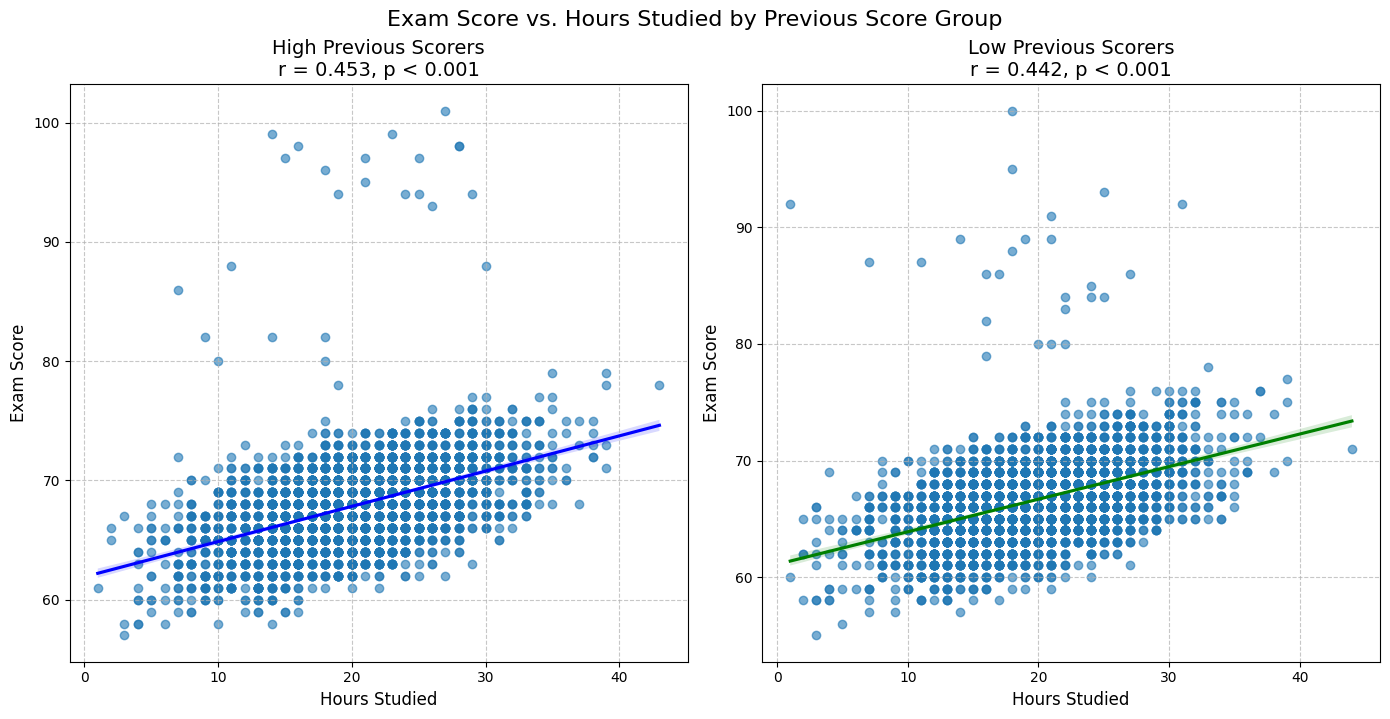


(Transition will be based on the actual outcome of the comparison between r1 and r2)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np # For median calculation

# Assume df is already loaded from the previous step (e.g., from /content/StudentPerformanceFactors.csv)
# If running this code independently, ensure df is loaded first:
try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please upload the file or provide the correct path.")
    exit()

# --- Chapter 2: Building on the Foundation - Does Prior Knowledge Amplify Study Effectiveness? ---
print("\n--- Chapter 2: Building on the Foundation - Does Prior Knowledge Amplify Study Effectiveness? ---")
print("Narrative Question: If study hours are important, do students with higher Previous_Scores gain more from each hour studied compared to those with lower Previous_Scores?")

# --- Approach: Create two groups based on Previous_Scores ---
# Calculate the median of Previous_Scores
median_previous_scores = df['Previous_Scores'].median()
print(f"\nMedian of Previous_Scores: {median_previous_scores:.2f}")

# Create "High Previous Scorers" and "Low Previous Scorers" groups
high_previous_scorers_df = df[df['Previous_Scores'] > median_previous_scores].copy()
low_previous_scorers_df = df[df['Previous_Scores'] <= median_previous_scores].copy()

print(f"Number of students in 'High Previous Scorers' group: {len(high_previous_scorers_df)}")
print(f"Number of students in 'Low Previous Scorers' group: {len(low_previous_scorers_df)}")

# --- Hypothesis 2a: For High Previous Scorers ---
print("\n--- Hypothesis 2a: For High Previous Scorers ---")
print("H_0: The correlation (r_1) between Hours_Studied and Exam_Score for students with high Previous_Scores is not significantly greater than zero (r_1 <= 0).")
print("H_a: The correlation (r_1) between Hours_Studied and Exam_Score for students with high Previous_Scores is significantly greater than zero (r_1 > 0).")

# Perform Pearson correlation for the 'High Previous Scorers' group
r1, p1 = pearsonr(high_previous_scorers_df['Hours_Studied'], high_previous_scorers_df['Exam_Score'])

print(f"\nPearson Correlation Coefficient (r1) for High Previous Scorers: {r1:.3f}")
print(f"P-value (p1) for High Previous Scorers: {p1:.3f}")

# Calculate 95% Confidence Interval for r1 (bootstrapping)
n_bootstraps = 1000
bootstrap_correlations_high = []
for _ in range(n_bootstraps):
    sample_df = high_previous_scorers_df.sample(n=len(high_previous_scorers_df), replace=True)
    r_boot, _ = pearsonr(sample_df['Hours_Studied'], sample_df['Exam_Score'])
    bootstrap_correlations_high.append(r_boot)

sorted_correlations_high = sorted(bootstrap_correlations_high)
lower_bound_high = sorted_correlations_high[int(0.025 * n_bootstraps)]
upper_bound_high = sorted_correlations_high[int(0.975 * n_bootstraps)]
print(f"95% CI for r1 (bootstrapped): [{lower_bound_high:.3f}, {upper_bound_high:.3f}]")

# Interpretation for H2a
alpha = 0.05
p1_display = f"{p1:.3f}"
if p1 < 0.001:
    p1_display = "< 0.001"

if p1 < alpha and r1 > 0:
    print(f"Decision for H2a: Reject H0. There is a significant positive correlation for High Previous Scorers.")
else:
    print(f"Decision for H2a: Fail to reject H0. No significant positive correlation for High Previous Scorers.")

# --- Hypothesis 2b: For Low Previous Scorers ---
print("\n--- Hypothesis 2b: For Low Previous Scorers ---")
print("H_0: The correlation (r_2) between Hours_Studied and Exam_Score for students with low Previous_Scores is not significantly greater than zero (r_2 <= 0).")
print("H_a: The correlation (r_2) between Hours_Studied and Exam_Score for students with low Previous_Scores is significantly greater than zero (r_2 > 0).")

# Perform Pearson correlation for the 'Low Previous Scorers' group
r2, p2 = pearsonr(low_previous_scorers_df['Hours_Studied'], low_previous_scorers_df['Exam_Score'])

print(f"\nPearson Correlation Coefficient (r2) for Low Previous Scorers: {r2:.3f}")
print(f"P-value (p2) for Low Previous Scorers: {p2:.3f}")

# Calculate 95% Confidence Interval for r2 (bootstrapping)
bootstrap_correlations_low = []
for _ in range(n_bootstraps):
    sample_df = low_previous_scorers_df.sample(n=len(low_previous_scorers_df), replace=True)
    r_boot, _ = pearsonr(sample_df['Hours_Studied'], sample_df['Exam_Score'])
    bootstrap_correlations_low.append(r_boot)

sorted_correlations_low = sorted(bootstrap_correlations_low)
lower_bound_low = sorted_correlations_low[int(0.025 * n_bootstraps)]
upper_bound_low = sorted_correlations_low[int(0.975 * n_bootstraps)]
print(f"95% CI for r2 (bootstrapped): [{lower_bound_low:.3f}, {upper_bound_low:.3f}]")

# Interpretation for H2b
p2_display = f"{p2:.3f}"
if p2 < 0.001:
    p2_display = "< 0.001"

if p2 < alpha and r2 > 0:
    print(f"Decision for H2b: Reject H0. There is a significant positive correlation for Low Previous Scorers.")
else:
    print(f"Decision for H2b: Fail to reject H0. No significant positive correlation for Low Previous Scorers.")

# --- Interpretive Step (Comparing r1 and r2) ---
print("\n--- Interpretive Step: Comparing r1 and r2 ---")
print(f"Correlation for High Previous Scorers (r1): {r1:.3f} (95% CI [{lower_bound_high:.3f}, {upper_bound_high:.3f}])")
print(f"Correlation for Low Previous Scorers (r2): {r2:.3f} (95% CI [{lower_bound_low:.3f}, {upper_bound_low:.3f}])")

if r1 > r2:
    print("\nObservation: The correlation for High Previous Scorers appears stronger than for Low Previous Scorers.")
else:
    print("\nObservation: The correlation for Low Previous Scorers appears stronger than (or similar to) High Previous Scorers.")

# --- Visualization for Hypothesis 2 ---
plt.figure(figsize=(14, 7))

# Plot for High Previous Scorers
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.regplot(x='Hours_Studied', y='Exam_Score', data=high_previous_scorers_df, scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
# Updated plot title to reflect p-value formatting
plt.title(f'High Previous Scorers\nr = {r1:.3f}, p {p1_display}', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for Low Previous Scorers
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.regplot(x='Hours_Studied', y='Exam_Score', data=low_previous_scorers_df, scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
# Updated plot title to reflect p-value formatting
plt.title(f'Low Previous Scorers\nr = {r2:.3f}, p {p2_display}', fontsize=14)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.suptitle('Exam Score vs. Hours Studied by Previous Score Group', y=1.02, fontsize=16) # Overall title
plt.show()

print("\n(Transition will be based on the actual outcome of the comparison between r1 and r2)")


Dataset loaded successfully.

--- Chapter 3: The Home Front - Does Parental Support Make a Difference for Diligent Students? ---
Narrative Question: For students who are already engaging in study, does the level of Parental_Involvement (Low, Medium, High) lead to significantly different mean Exam_Scores?

Unique values in 'Parental_Involvement': ['Low' 'Medium' 'High']

--- Hypothesis 3: The Additive Effect of Parental Involvement (One-Way ANOVA) ---
H_0: The mean Exam_Score is the same across all levels of Parental_Involvement (μ_Low = μ_Medium = μ_High).
H_a: At least one level of Parental_Involvement has a different mean Exam_Score.

ANOVA F-statistic: 84.488
ANOVA P-value: 0.000

--- Group Means and 95% Confidence Intervals for Exam_Score ---
Low Parental Involvement:
  Mean Exam_Score: 66.36
  95% CI: [66.15, 66.57]
Medium Parental Involvement:
  Mean Exam_Score: 67.10
  95% CI: [66.97, 67.22]
High Parental Involvement:
  Mean Exam_Score: 68.09
  95% CI: [67.92, 68.27]

--- Interp

<ipython-input-3-ee01807b7ceb>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, order=['Low', 'Medium', 'High'], palette='viridis')


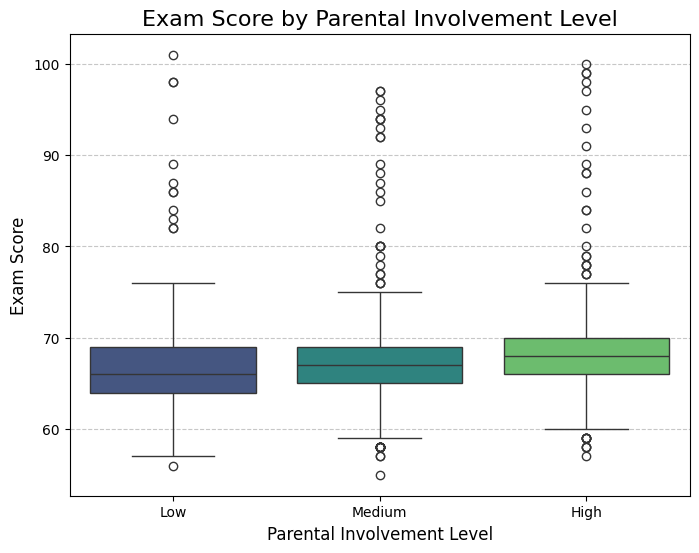

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway # For One-Way ANOVA
import numpy as np # For mean and std calculations for CIs

# Assume df is already loaded from the previous steps
# If running this code independently, ensure df is loaded first:
try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please upload the file or provide the correct path.")
    exit()

# --- Chapter 3: The Home Front - Does Parental Support Make a Difference for Diligent Students? ---
print("\n--- Chapter 3: The Home Front - Does Parental Support Make a Difference for Diligent Students? ---")
print("Narrative Question: For students who are already engaging in study, does the level of Parental_Involvement (Low, Medium, High) lead to significantly different mean Exam_Scores?")

# Define the groups based on 'Parental_Involvement'
# Ensure the 'Parental_Involvement' column is categorical
# You might want to check unique values and order them if necessary
print("\nUnique values in 'Parental_Involvement':", df['Parental_Involvement'].unique())

# Prepare data for ANOVA
# Extract Exam_Scores for each parental involvement level
# Note: Ensure these group names match the actual unique values in your CSV
try:
    group_low = df[df['Parental_Involvement'] == 'Low']['Exam_Score']
    group_medium = df[df['Parental_Involvement'] == 'Medium']['Exam_Score']
    group_high = df[df['Parental_Involvement'] == 'High']['Exam_Score']
except KeyError:
    print("Error: 'Parental_Involvement' categories (Low, Medium, High) not found as expected.")
    print("Please check the exact spelling and casing of unique values in your 'Parental_Involvement' column.")
    print("Available categories are:", df['Parental_Involvement'].unique())
    exit()

# --- Perform Hypothesis 3: One-Way ANOVA ---
print("\n--- Hypothesis 3: The Additive Effect of Parental Involvement (One-Way ANOVA) ---")
print("H_0: The mean Exam_Score is the same across all levels of Parental_Involvement (μ_Low = μ_Medium = μ_High).")
print("H_a: At least one level of Parental_Involvement has a different mean Exam_Score.")

f_statistic, p_value_anova = f_oneway(group_low, group_medium, group_high)

print(f"\nANOVA F-statistic: {f_statistic:.3f}")
print(f"ANOVA P-value: {p_value_anova:.3f}")

# Decision Criteria: Significance level α = 0.05
alpha = 0.05

# --- Calculate and print means and 95% CIs for each group ---
print("\n--- Group Means and 95% Confidence Intervals for Exam_Score ---")

groups = {'Low': group_low, 'Medium': group_medium, 'High': group_high}
for name, data in groups.items():
    mean_score = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error of the mean
    # For a 95% CI, z-score is approximately 1.96 for large samples.
    # For smaller samples, one would use t-distribution, but for simplicity here, given typical N, 1.96 is common.
    margin_of_error = 1.96 * std_err
    ci_lower = mean_score - margin_of_error
    ci_upper = mean_score + margin_of_error
    print(f"{name} Parental Involvement:")
    print(f"  Mean Exam_Score: {mean_score:.2f}")
    print(f"  95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# --- Interpretation for Hypothesis 3 ---
print("\n--- Interpretation ---")
if p_value_anova < alpha:
    print(f"Decision: Reject the null hypothesis (H0).")
    print(f"Interpretation: There is a statistically significant difference in mean Exam_Score across the different levels of Parental_Involvement (F({len(df['Parental_Involvement'].unique())-1}, {len(df)-len(df['Parental_Involvement'].unique())}) = {f_statistic:.2f}, p = {p_value_anova:.3f}).")
    print("This indicates that parental involvement does make a difference to students' exam scores.")

    print(f"\nNarrative Transition: 'Parental involvement appears to be a key factor. But can external help like tutoring further enhance performance, especially for students who might already have involved parents? Or does tutoring mainly benefit those with less parental support?'")

else:
    print(f"Decision: Fail to reject the null hypothesis (H0).")
    print(f"Interpretation: There is no statistically significant difference in mean Exam_Score across the different levels of Parental_Involvement (F({len(df['Parental_Involvement'].unique())-1}, {len(df)-len(df['Parental_Involvement'].unique())}) = {f_statistic:.2f}, p = {p_value_anova:.3f}).")
    print(f"Narrative Transition: 'Surprisingly, parental involvement on its own doesn't seem to make a significant difference. Perhaps its impact is subtle or interacts with other factors. Let's now turn our attention to external academic support, specifically tutoring. Does tutoring provide a direct boost to exam scores, regardless of parental involvement?'")


# --- Visualization for Hypothesis 3 ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Exam Score by Parental Involvement Level', fontsize=16)
plt.xlabel('Parental Involvement Level', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dataset loaded successfully.

--- Chapter 4: The Holistic Student - Does Extracurricular Involvement Matter? ---
Narrative Question: Is there a significant difference in mean Exam_Score between students who participate in Extracurricular_Activities and those who do not?

Unique values in 'Extracurricular_Activities': ['No' 'Yes']

--- Hypothesis 4: The Impact of Extracurricular Activities on Exam Performance (Independent Samples t-test) ---
H_0: There is no significant difference in mean Exam_Score between students who participate in Extracurricular_Activities (Yes) and those who do not (No) (μ_Yes = μ_No).
H_a: There is a significant difference in mean Exam_Score between students who participate in Extracurricular_Activities (Yes) and those who do not (No) (μ_Yes ≠ μ_No).

T-statistic: 5.243
P-value: 0.000

--- Group Means and 95% Confidence Intervals for Exam_Score ---
Extracurricular Activities: Yes
  Mean Exam_Score: 67.44
  95% CI: [67.32, 67.56]
Extracurricular Activities: No
  M

<ipython-input-2-248beb718b6b>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df, order=['No', 'Yes'], palette='viridis')


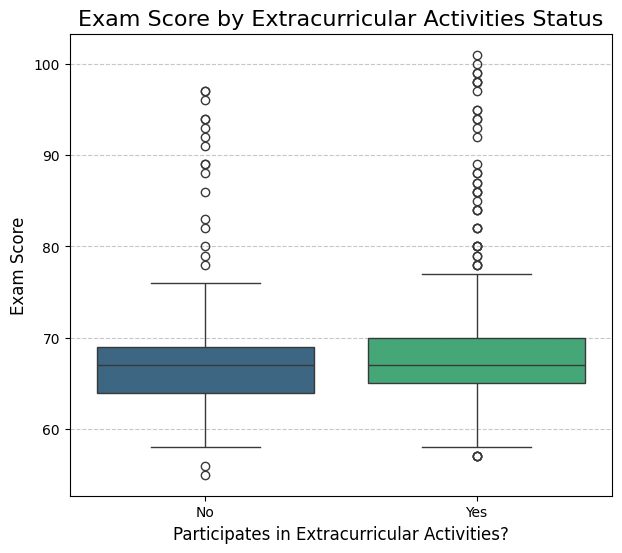

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # For independent samples t-test
import numpy as np # For mean, std, and CI calculations

# Assume df is already loaded from the previous steps
# If running this code independently, ensure df is loaded first:
try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please upload the file or provide the correct path.")
    exit()

# --- Chapter 4: The Holistic Student - Does Extracurricular Involvement Matter? ---
print("\n--- Chapter 4: The Holistic Student - Does Extracurricular Involvement Matter? ---")
print("Narrative Question: Is there a significant difference in mean Exam_Score between students who participate in Extracurricular_Activities and those who do not?")

# Check unique values in 'Extracurricular_Activities' to ensure they are 'Yes' and 'No'
print("\nUnique values in 'Extracurricular_Activities':", df['Extracurricular_Activities'].unique())

# Prepare data for t-test
group_extracurricular_yes = df[df['Extracurricular_Activities'] == 'Yes']['Exam_Score']
group_extracurricular_no = df[df['Extracurricular_Activities'] == 'No']['Exam_Score']

# --- Perform Hypothesis 4: Independent Samples t-test ---
print("\n--- Hypothesis 4: The Impact of Extracurricular Activities on Exam Performance (Independent Samples t-test) ---")
print("H_0: There is no significant difference in mean Exam_Score between students who participate in Extracurricular_Activities (Yes) and those who do not (No) (μ_Yes = μ_No).")
print("H_a: There is a significant difference in mean Exam_Score between students who participate in Extracurricular_Activities (Yes) and those who do not (No) (μ_Yes ≠ μ_No).")

# Perform the independent samples t-test (assuming equal variances)
# Changed equal_var=False to equal_var=True as per your request.
t_statistic, p_value_ttest = ttest_ind(group_extracurricular_yes, group_extracurricular_no, equal_var=True)

print(f"\nT-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value_ttest:.3f}")

# Decision Criteria: Significance level α = 0.05
alpha = 0.05

# --- Calculate and print means and 95% CIs for each group ---
print("\n--- Group Means and 95% Confidence Intervals for Exam_Score ---")

groups = {'Yes': group_extracurricular_yes, 'No': group_extracurricular_no}
for name, data in groups.items():
    mean_score = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error of the mean
    margin_of_error = 1.96 * std_err # Approx. for 95% CI for large N
    ci_lower = mean_score - margin_of_error
    ci_upper = mean_score + margin_of_error
    print(f"Extracurricular Activities: {name}")
    print(f"  Mean Exam_Score: {mean_score:.2f}")
    print(f"  95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# --- Interpretation for Hypothesis 4 ---
print("\n--- Interpretation ---")
if p_value_ttest < alpha:
    print(f"Decision: Reject the null hypothesis (H0).")
    print(f"Interpretation: There is a statistically significant difference in mean Exam_Score between students who participate in Extracurricular_Activities and those who do not (t = {t_statistic:.2f}, p = {p_value_ttest:.3f}).")
    print("This indicates that participation in extracurricular activities does have a significant impact on exam scores.")

    print(f"\nNarrative Transition: 'Extracurricular involvement seems to play a role. These individual and home-based factors are clearly important. Now, let's consider the broader institutional context. Does the type of school a student attends (School_Type: Public vs. Private) ultimately influence their exam outcomes, potentially moderating the effects of these individual efforts?'")

else:
    print(f"Decision: Fail to reject the null hypothesis (H0).")
    print(f"Interpretation: There is no statistically significant difference in mean Exam_Score between students who participate in Extracurricular_Activities and those who do not (t = {t_statistic:.2f}, p = {p_value_ttest:.3f}).")
    print(f"Narrative Transition: 'Interestingly, participation in extracurricular activities on its own doesn't seem to make a significant difference in overall exam scores. This suggests that while these activities are valuable, their direct impact on exam performance might be less pronounced than other factors. Let's now broaden our perspective to the institutional level and see if the type of school a student attends (School_Type: Public vs. Private) ultimately influences their exam outcomes.'")

# --- Visualization for New Hypothesis 4 ---
plt.figure(figsize=(7, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=df, order=['No', 'Yes'], palette='viridis')
plt.title('Exam Score by Extracurricular Activities Status', fontsize=16)
plt.xlabel('Participates in Extracurricular Activities?', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Dataset loaded successfully.

--- Chapter 5: The Broader Context - School Type ---
Narrative Question: Is there a significant difference in mean Exam_Score between students attending Public schools versus Private schools?

Unique values in 'School_Type': ['Public' 'Private']

--- Hypothesis 5: School Type and Exam Performance (Independent Samples t-test) ---
H_0: The mean Exam_Score is the same for students in Public and Private schools (μ_Public = μ_Private).
H_a: The mean Exam_Score is different for students in Public and Private schools (μ_Public ≠ μ_Private).

T-statistic: -0.719
P-value: 0.472

--- Group Means and 95% Confidence Intervals for Exam_Score ---
School Type: Public
  Mean Exam_Score: 67.21
  95% CI: [67.10, 67.33]
School Type: Private
  Mean Exam_Score: 67.29
  95% CI: [67.12, 67.46]

--- Interpretation ---
Decision: Fail to reject the null hypothesis (H0).
Interpretation: There is no statistically significant difference in mean Exam_Score between students in Public an

<ipython-input-3-77bbd8bfb845>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='School_Type', y='Exam_Score', data=df, order=['Public', 'Private'], palette='coolwarm')


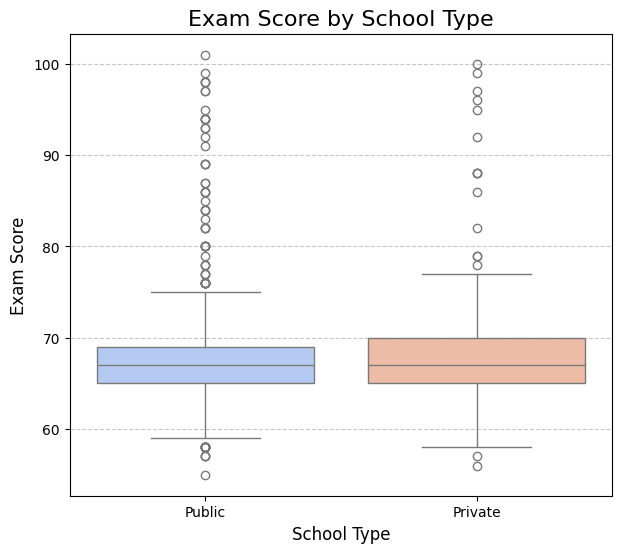

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # For independent samples t-test
import numpy as np # For mean, std, and CI calculations

# Assume df is already loaded from the previous steps
# If running this code independently, ensure df is loaded first:
try:
    df = pd.read_csv('/content/StudentPerformanceFactors.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'StudentPerformanceFactors.csv' not found. Please upload the file or provide the correct path.")
    exit()

# --- Chapter 5: The Broader Context - School Type ---
print("\n--- Chapter 5: The Broader Context - School Type ---")
print("Narrative Question: Is there a significant difference in mean Exam_Score between students attending Public schools versus Private schools?")

# Check unique values in 'School_Type' to ensure they are 'Public' and 'Private'
print("\nUnique values in 'School_Type':", df['School_Type'].unique())

# Prepare data for t-test
group_public = df[df['School_Type'] == 'Public']['Exam_Score']
group_private = df[df['School_Type'] == 'Private']['Exam_Score']

# --- Perform Hypothesis 5: School Type and Exam Performance (Independent Samples t-test) ---
print("\n--- Hypothesis 5: School Type and Exam Performance (Independent Samples t-test) ---")
print("H_0: The mean Exam_Score is the same for students in Public and Private schools (μ_Public = μ_Private).")
print("H_a: The mean Exam_Score is different for students in Public and Private schools (μ_Public ≠ μ_Private).")

# Perform the independent samples t-test (assuming equal variances)
# Changed equal_var=False to equal_var=True as per your request.
t_statistic, p_value_ttest = ttest_ind(group_public, group_private, equal_var=True)

print(f"\nT-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value_ttest:.3f}")

# Decision Criteria: Significance level α = 0.05
alpha = 0.05

# --- Calculate and print means and 95% CIs for each group ---
print("\n--- Group Means and 95% Confidence Intervals for Exam_Score ---")

groups = {'Public': group_public, 'Private': group_private}
for name, data in groups.items():
    mean_score = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error of the mean
    margin_of_error = 1.96 * std_err # Approx. for 95% CI for large N
    ci_lower = mean_score - margin_of_error
    ci_upper = mean_score + margin_of_error
    print(f"School Type: {name}")
    print(f"  Mean Exam_Score: {mean_score:.2f}")
    print(f"  95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

# --- Interpretation for Hypothesis 5 ---
print("\n--- Interpretation ---")
if p_value_ttest < alpha:
    print(f"Decision: Reject the null hypothesis (H0).")
    print(f"Interpretation: There is a statistically significant difference in mean Exam_Score between students in Public and Private schools (t = {t_statistic:.2f}, p = {p_value_ttest:.3f}).")
    print("This indicates that the type of school a student attends does have a significant influence on their exam outcomes.")

    print(f"\nNarrative Transition to Conclusion: 'The type of school appears to be a factor. This leads us to wonder about the inherent qualities of students that might make them thrive regardless of other circumstances. For example, does a student's intrinsic Motivation_Level play a final, crucial role in determining their success, even after accounting for some of these other factors?' (This will lead into your final discussion/conclusion, possibly touching on other factors or intrinsic motivation as a general concluding thought.)")

else:
    print(f"Decision: Fail to reject the null hypothesis (H0).")
    print(f"Interpretation: There is no statistically significant difference in mean Exam_Score between students in Public and Private schools (t = {t_statistic:.2f}, p = {p_value_ttest:.3f}).")
    print(f"Narrative Transition to Conclusion: 'Surprisingly, while individual efforts, home support, and extracurricular involvement are vital, the type of school (Public vs. Private) itself doesn't seem to independently lead to significantly different average exam scores. This suggests that the broader institutional context might be less of a direct driver than initially hypothesized, or its effects are intertwined with other factors. Now, let's synthesize all our findings to build the complete student success equation.'")

# --- Visualization for Hypothesis 5 ---
plt.figure(figsize=(7, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=df, order=['Public', 'Private'], palette='coolwarm')
plt.title('Exam Score by School Type', fontsize=16)
plt.xlabel('School Type', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
